In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt



In [9]:
# 1. Create Dataset

x = torch.linspace(-50,50,200).reshape(-1, 1)
y = 3*x + 2


In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x)) 
        return self.fc2(x)


In [20]:

model = Net()
print(model)


Net(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [21]:
# 3. Define Loss Function and Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
lambda_l2 = 0.01  # Regularization strength

# 4. Training Loop
for epoch in range(1000):
    optimizer.zero_grad()  # zero the gradient buffers
    outputs = model(x)  # forward pass
    mse_loss = loss_fn(outputs, y)  # comparing the outputs to the labels
    
    # Calculate L2 regularization loss
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param) # torch.norm() calculates the L2 norm of a tensor. Norm is a function that calculates the length or magnitude of a vector.
    
    # Combine MSE loss and L2 regularization loss
    loss = mse_loss + lambda_l2 * l2_reg
    
    loss.backward()  # backpropagation
    optimizer.step()  # update the parameters

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 8360.119140625
Epoch 101, Loss: 10.580754280090332
Epoch 201, Loss: 0.7851240634918213
Epoch 301, Loss: 0.681544840335846
Epoch 401, Loss: 0.5800787806510925
Epoch 501, Loss: 0.48682987689971924
Epoch 601, Loss: 0.4048062562942505
Epoch 701, Loss: 0.3343573212623596
Epoch 801, Loss: 0.27538201212882996
Epoch 901, Loss: 0.22719460725784302


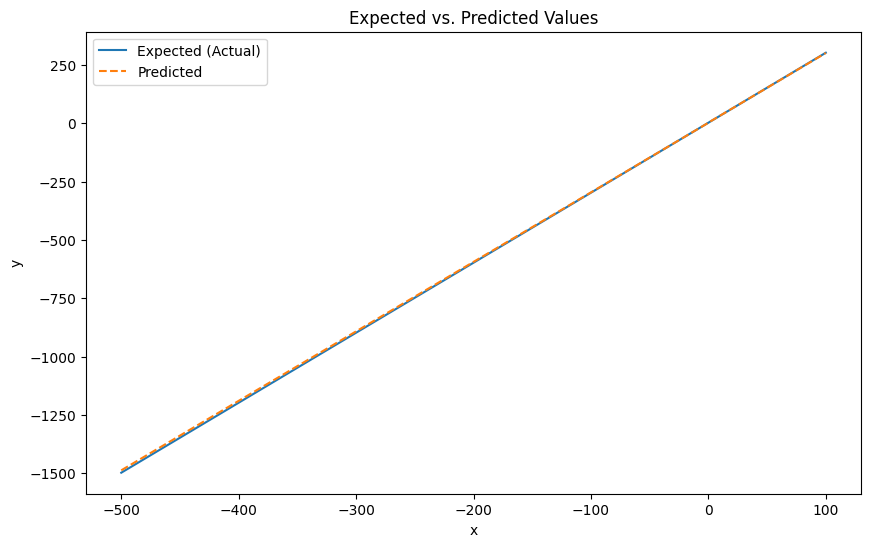

In [22]:
# Create a validation set
x_val = torch.linspace(-500, 100, 10000).reshape(-1, 1)  # Different number of samples or range
y_val = 3*x_val + 2

# Testing/Evaluation
with torch.no_grad():
    y_pred = model(x_val)

y_val_np = y_val.numpy()
y_pred_np = y_pred.numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_val.numpy(), y_val_np, label='Expected (Actual)')
plt.plot(x_val.numpy(), y_pred_np, label='Predicted', linestyle='--')
plt.title('Expected vs. Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()